In [2]:
import pandas as pd
import numpy as nd
import sys
import matplotlib.pylab as plt

data = pd.read_csv("us_perm_visas.csv")
date = data.decision_date
status = data.case_status
dateStatus = data[["decision_date", "case_status"]]






C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
dateStatus = dateStatus.sort_values("decision_date")

certifiedRate = []
appNum = []
dateData = []
counterCertified = 0
counterNonWithdrawn = 0
counterApplicant = 0
#loop through the data set
for i in range(0,len(dateStatus)-1):
    counterApplicant+=1
    #count the number of applicants who didnt withdrawn
    if(dateStatus.iloc[i][1]!="Withdrawn"):
        counterNonWithdrawn+=1
    #count the number of certified applicants. 
    if(dateStatus.iloc[i][1]=="Certified" or dateStatus.iloc[i][1]=="Certified-Expired"):
        counterCertified+=1
    #stastic is monthly based
    #reupdate counters for new month
    if(dateStatus.iloc[i][0][:4]!=dateStatus.iloc[i+1][0][:4]):
        certifiedRatio = counterCertified/counterNonWithdrawn
        certifiedRate.append(certifiedRatio)
        dateData.append(dateStatus.iloc[i][0][:4])
        appNum.append(counterApplicant)
        counterCertified=0
        counterApplicant=0
        counterNonWithdrawn=0
certifiedRatio = counterCertified/counterNonWithdrawn
certifiedRate.append(certifiedRatio)
dateData.append(dateStatus.iloc[len(dateStatus)-1][0][:4])
appNum.append(counterApplicant)

In [7]:
'''for i in range(0,len(dateData)):
    print(dateData[i], ": ", appNum[i])'''

print(len(appNum))

6


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

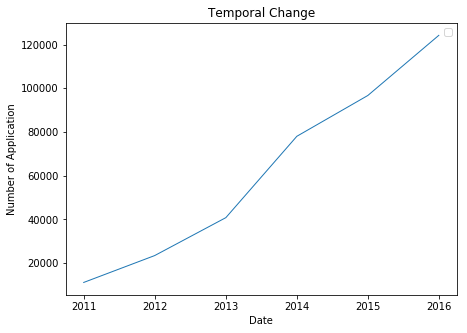

In [14]:
def temporal_graph1(x_data,y_data,xlabel,ylabel,title):
    plt.tight_layout()
    plt.figure(figsize=(7,5))
    plt.plot(x_data, y_data, linewidth=1)
    #plt.plot(x_data, y_data[1], linewidth=1, label = "Close")
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig("./temporal3.pdf")

datedate = pd.to_datetime(dateData)
temporal_graph1(datedate,appNum,"Date","Number of Application","Temporal Change")

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

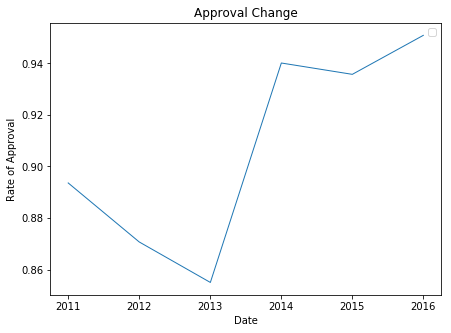

In [15]:
def temporal_graph2(x_data,y_data,xlabel,ylabel,title):
    plt.tight_layout()
    plt.figure(figsize=(7,5))
    plt.plot(x_data, y_data, linewidth=1)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig("./rate3.pdf")

datedate = pd.to_datetime(dateData)
temporal_graph2(datedate,certifiedRate,"Date","Rate of Approval","Approval Change")